In [1]:
from fastmri.data import transforms as T
import fastmri
import h5py
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

from utils_tf import virtual_coil_reconstruction, adjust_image_size


2023-12-20 11:15:25.283483: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-20 11:15:25.283537: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-20 11:15:25.285148: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-20 11:15:25.293345: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-20 11:15:28.145192: W tensorflow/compiler/tf2

In [2]:
file_path = "/volatile/FastMRI/brain_multicoil_train/multicoil_train/file_brain_AXT1POST_201_6002780.h5"
hf = h5py.File(file_path)

In [3]:
volume_kspace = hf['kspace'][()]
print(volume_kspace.dtype)
print(volume_kspace.shape)
# print(volume_kspace)

complex64
(16, 16, 640, 320)


In [4]:
dimension = len(volume_kspace.shape) -2
image_size=(volume_kspace.shape[2:])

if dimension == 2 :
    images = tf.signal.ifft2d(volume_kspace)
elif dimension == 3 : 
    images = tf.signal.ifft3d(volume_kspace)

images = tf.signal.fftshift(images)
# images = adjust_image_size(images, image_size, multicoil= True)
# print(images)
# print(images.shape)

2023-12-20 11:15:32.671433: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6676 MB memory:  -> device: 0, name: Quadro M4000, pci bus id: 0000:03:00.0, compute capability: 5.2


In [5]:
complex_image = virtual_coil_reconstruction(images)
# print(complex_image)
print(complex_image.shape)

(16, 640, 320)


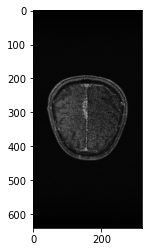

In [6]:
image_goodShape = complex_image[0]
plt.imshow(np.abs(image_goodShape.numpy()), cmap='gray')
